# Topic 4: Data Cleaning & Transformation
-	Regex (Regular expressions)
-	Variable Imputation
    o	Missing Value Treatment 
    o	Outlier Treatment
-	Variable Binning
-	One hot Encoder
-	Variable Transformation


### 1.Why do we need Regular Experessions (REGEX) ?

#### Dealing with text responses, helps to find or match a set of strings based on Patterns

1. Match
2. Search
3. Search and Replace
4. Split

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
import os

pd.set_option('display.max_colwidth', -1)

### 1.1 Regex Fuctions

#### Match - re.match(pattern, string)

In [2]:
print(re.match('dog', 'dogs'))

<_sre.SRE_Match object; span=(0, 3), match='dog'>


#### Search - re.search(pattern, string) OR re.findall(pattern, string)

In [3]:
print(re.findall('cat', 'dfacatsab dfaabcat dog'))

['cat', 'cat']


In [4]:
print(re.search('cat', 'cats dogs cat'))

<_sre.SRE_Match object; span=(0, 3), match='cat'>


#### Search & Replace - re.sub(pattern, repl, string)

In [5]:
re.sub('cat', 'xx', 'dog cat')

'dog xx'

#### Split based on a character/delimiter - re.split(split_pattern, string)

In [6]:
print(re.split('c','abcdbcef'))

['ab', 'db', 'ef']


### 1.2 Patterns

#### "^" - matches the start of a string

In [7]:
print(re.findall('^ab', 'ab afds'))

['ab']


#### "\w" - matches the alphanumeric character in the string

In [8]:
print(re.findall('^\w', 'abdfasafds'))

['a']


In [9]:
print(re.findall('^\w+', 'abdfasafds4845 dfas'))

['abdfasafds4845']


### 1.3 Numbers

In [10]:
# Numbers

In [11]:
print(re.findall('[0-9]', 'abdfas14846s dfas'))

['1', '4', '8', '4', '6']


In [12]:
print(re.findall('\d', 'abdfas14846s dfas'))

['1', '4', '8', '4', '6']


#### difference between [0-9] & \d 
#### You specify the range of digits in [0-9]

In [13]:
print(re.findall('[0-5]', 'abdfas14846s dfas'))

['1', '4', '4']


#### to get the series of numbers 

In [14]:
print(re.findall('[0-9]+', 'abdfas14846s dfas'))

['14846']


In [15]:
print(re.findall('\d+', 'abdfas14846s dfas'))

['14846']


### 1.4 Characters

In [16]:
print(re.findall('[az]', 'abdfasz14846s dfasFASF'))

['a', 'a', 'z', 'a']


In [17]:
print(re.findall('[a-z|A-Z]', 'abdfasz14846s dfasSDFAS'))

['a', 'b', 'd', 'f', 'a', 's', 'z', 's', 'd', 'f', 'a', 's', 'S', 'D', 'F', 'A', 'S']


In [18]:
print(re.findall('[a-z]+', 'abdfass dfasADFA'))

['abdfass', 'dfas']


In [19]:
print(re.findall('[a-z|A-Z]+', 'abdfas14846s dfasADFA'))

['abdfas', 's', 'dfasADFA']


### 1.5 Special Charaters

In [20]:
re.findall('\W', " *dfa  ()fasdf ")

[' ', '*', ' ', ' ', '(', ')', ' ']

In [21]:
re.findall('\W+', " *ddfa()")

[' *', '()']

#### Greedy Qualifiers in Patterns (+, ?, *) - To match as much as possible with the texts

In [22]:
re.findall('ab?', "*dabdfa()abcdaabcefaa") ## ? mark applies to the charcter before the question mark

['ab', 'a', 'ab', 'a', 'ab', 'a', 'a']

In [23]:
re.findall('abc*', " *dabdfa()abcdaabcefaa abc")  ## * whatever be the characters post the pattern

['ab', 'abc', 'abc', 'abc']

#### Meta characters need escape character for the patterns

In [24]:
# . ^ $ * ( ) [ ] + ? | { } \ /

In [25]:
re.findall('\(', " *dabdfa()abcdaabcefaa abc") 

['(']

### 1.6 Applying Regex on Dataframe

In [26]:
#Dataframe Creation

df = pd.DataFrame({'Table1': ['d2r', 'cd',
                              'sd', 'rd'],
                   'Item': ['380.', '(ab)', 'k', 'f']})

In [27]:
# option 1 - faster way
df['Table1'] =  [re.sub('d','', str(x)) for x in df['Table1']]

# option 2
df['Table1'] =  df['Table1'].apply(lambda x: re.sub('d','', str(x)))

In [28]:
#Creating true or false
df['New_Column'] = df.Table1.str.match('2r')

In [29]:
df['b'] = df['Item'].str.findall('\\(')
df

,Table1,Item,New_Column,b
0,2r,380.,True,[]
1,c,(ab),False,[(]
2,s,k,False,[]
3,r,f,False,[]


### Practice Questions

In [30]:
#abbreviate 'Road' as 'Rd.' in a given string 
street = '21 Ramkrishna Roader Road'
print(re.sub('Road$', 'Rd.', street))

21 Ramkrishna Roader Rd.


In [31]:
# find all six characters long word in a string
print(re.findall(r"\b\w{3}\b", "dogs cat puppy rat"))

['cat', 'rat']


In [32]:
#find urls in a string.
text = '<a href="https://w3resource.com">Python Examples</a><a href="http://github.com fasdf">Even More Examples</a>'
re.findall('http[s]?://(?:[a-zA-Z0-9]|[$-_@&.]com)+', text)

['https://w3resource.com', 'http://github.com']

### 2.Variable Imputaion

#### Data Import and understanding

In [33]:
#Importing the dataset
df = pd.read_csv('import.csv')

In [34]:
#View Data
df.head()

,customerid,Age,Cartype,Income,Amount
0,A12345,66,Edge,2500.0,10000
1,A123090,59,Escape,2721.0,4704
2,A233835,23,Fseries,3518.0,3765
3,A344580,45,NaN,2295.0,3923
4,A455325,49,Escape,1360.0,4897


In [35]:
df.shape

(32, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
customerid    32 non-null object
Age           32 non-null int64
Cartype       27 non-null object
Income        29 non-null float64
Amount        32 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


In [37]:
df.head()

,customerid,Age,Cartype,Income,Amount
0,A12345,66,Edge,2500.0,10000
1,A123090,59,Escape,2721.0,4704
2,A233835,23,Fseries,3518.0,3765
3,A344580,45,NaN,2295.0,3923
4,A455325,49,Escape,1360.0,4897


### 2.1 Handling null values 

In [38]:
df.isnull().sum()

customerid    0
Age           0
Cartype       5
Income        3
Amount        0
dtype: int64

#### Droping Null values 

In [39]:
data1 = df.dropna()
data1.shape

(25, 5)

In [40]:
df1 = df.dropna(subset=['Cartype'])
df1.shape

(27, 5)

#### Imputing Null Values

In [41]:
data2 = df.fillna(df.median())

In [42]:
data2.head()

,customerid,Age,Cartype,Income,Amount
0,A12345,66,Edge,2500.0,10000
1,A123090,59,Escape,2721.0,4704
2,A233835,23,Fseries,3518.0,3765
3,A344580,45,NaN,2295.0,3923
4,A455325,49,Escape,1360.0,4897


In [43]:
data2.isnull().sum()

customerid    0
Age           0
Cartype       5
Income        0
Amount        0
dtype: int64

In [44]:
# Categorical
data2['Cartype'].fillna('Missing', inplace=True)

In [45]:
data2.isnull().sum()

customerid    0
Age           0
Cartype       0
Income        0
Amount        0
dtype: int64

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
customerid    32 non-null object
Age           32 non-null int64
Cartype       32 non-null object
Income        32 non-null float64
Amount        32 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


#### Auto Impute : https://pypi.org/project/autoimpute/

#### 2.2 Outlier Treatement

In [47]:
#Box plot
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Box Plot

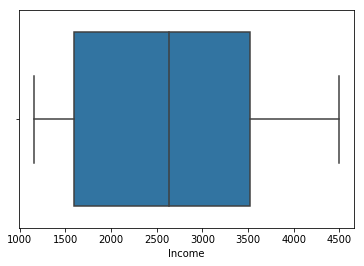

In [48]:
sns.boxplot(x=df['Income'])

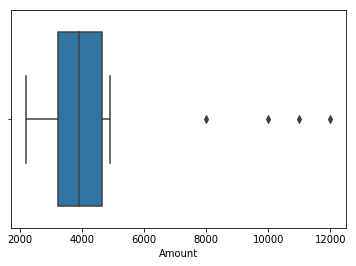

In [49]:
sns.boxplot(x=df['Amount'])

What are criteria to identify an outlier?
Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3)
and below the 1st quartile (Q1)

In [50]:
Q1=df['Amount'].quantile(0.25)
Q3=df['Amount'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

3217.75
4657.25
1439.5
1058.5 6816.5


In [51]:
df.shape

(32, 5)

In [52]:
#Treatment
df = df[df['Amount']< Upper_Whisker]

In [53]:
df.shape

(28, 5)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

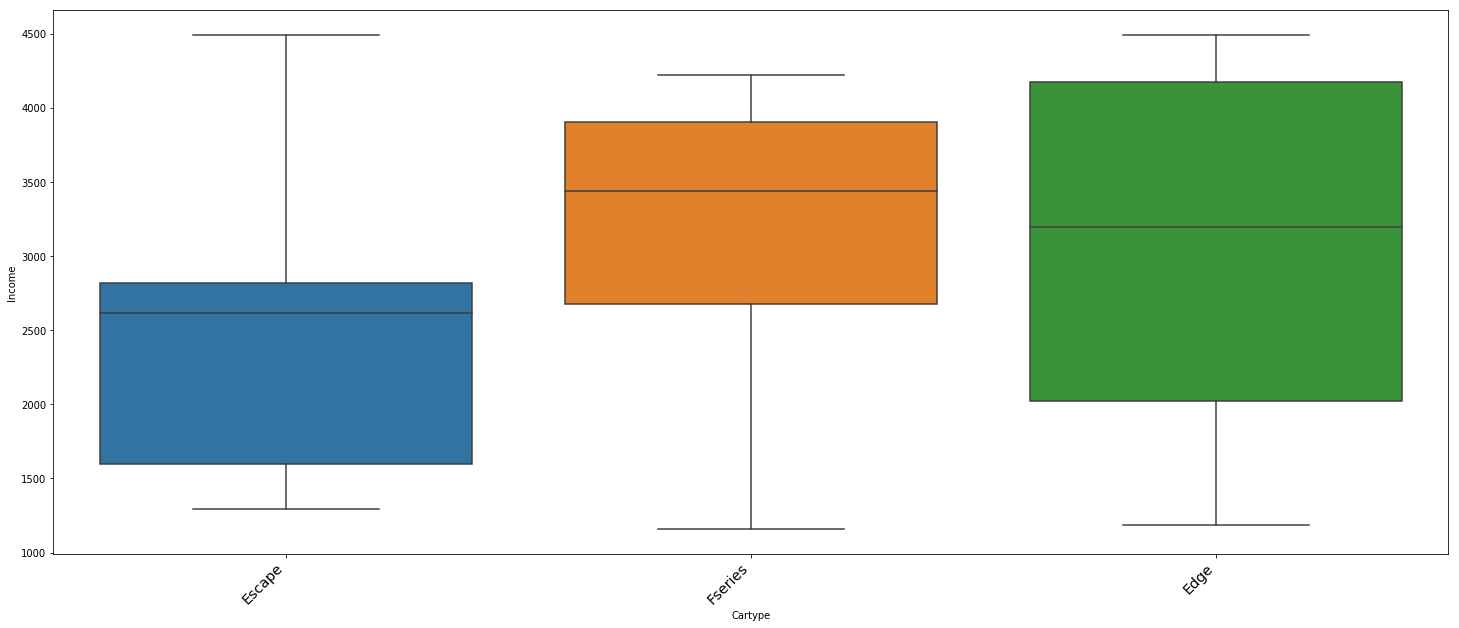

In [54]:
#seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
plt.figure(figsize=(25, 10))
chart=sns.boxplot(df['Cartype'],df['Income'],color=None,palette=None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#### Zscore

What are criteria to identify an outlier?
      
 Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation.

In [55]:
from scipy import stats
z=np.abs(stats.zscore(df.Amount))
print(z)

[1.21680252 0.10360541 0.29091653 1.44560662 0.66672429 0.33833707
 0.01968799 1.32468424 0.5496125  0.17947827 0.1003029  0.10716195
 1.14330069 1.67585026 0.54368493 0.39761274 0.99748254 1.21561701
 1.28463083 1.06742783 0.25179459 1.70430258 1.76357825 0.0858227
 0.62311433 1.43163449 1.72208528 0.58610937]


In [56]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64),)


In [57]:
df1=df[(z< 3)]
df1.head()

,customerid,Age,Cartype,Income,Amount
1,A123090,59,Escape,2721.0,4704
2,A233835,23,Fseries,3518.0,3765
3,A344580,45,NaN,2295.0,3923
4,A455325,49,Escape,1360.0,4897
5,A566070,57,Escape,4493.0,4240


In [95]:
df1.shape

(28, 5)

### 3. Variable Binning

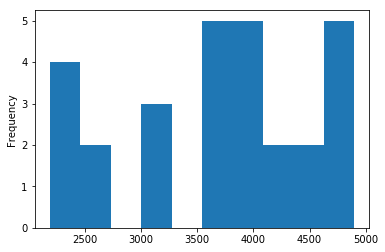

In [58]:
df1['Amount'].plot(kind='hist')

In [59]:
data2['Cartype'].value_counts()

Escape     11
Fseries    8 
Edge       8 
Missing    5 
Name: Cartype, dtype: int64

In [60]:
df2 = data2.groupby(['Cartype'])['Income'].sum().reset_index()

In [61]:
df3 = data1.groupby(['Cartype'])['Income'].count().reset_index()
df3 = df3.rename(columns={'Income':'Count'})

In [62]:
df3

,Cartype,Count
0,Edge,7
1,Escape,10
2,Fseries,8


In [63]:
threshold = np.percentile(df3['Count'],40) 

In [64]:
threshold

7.8

#### Group the lower volume classes to a group 'Other'

In [65]:
df3['CarType_new']=np.where(df3['Count']<threshold, 'Other', df3['Cartype'])

In [66]:
df3

,Cartype,Count,CarType_new
0,Edge,7,Other
1,Escape,10,Escape
2,Fseries,8,Fseries


### 4. Onehot Encoder

#### 4.1 Get Dummies method

In [67]:
gd=pd.get_dummies(data2['Cartype'], prefix='Car')
gd.head()

,Car_Edge,Car_Escape,Car_Fseries,Car_Missing
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [68]:
gd=pd.get_dummies(data2["Cartype"],prefix='Car',drop_first=True)
gd.head()

,Car_Escape,Car_Fseries,Car_Missing
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [69]:
gd=pd.get_dummies(data2["Cartype"],prefix='Car',dummy_na=True)
gd.head()

# pd.get_dummies(df['Income'], dummy_na=True)

,Car_Edge,Car_Escape,Car_Fseries,Car_Missing,Car_nan
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0


#### 4.2 One hot encoder

In [70]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
data2["Dummies"] = Enc_label.fit_transform(data2["Cartype"])
DF_dummies2 = pd.DataFrame(Enc_ohe.fit_transform(data2[["Dummies"]]).todense(), columns = Enc_label.classes_)
   

In [71]:
df = pd.concat([data2, DF_dummies2], axis=1)
df.head()

,customerid,Age,Cartype,Income,Amount,Dummies,Edge,Escape,Fseries,Missing
0,A12345,66,Edge,2500.0,10000,0,1.0,0.0,0.0,0.0
1,A123090,59,Escape,2721.0,4704,1,0.0,1.0,0.0,0.0
2,A233835,23,Fseries,3518.0,3765,2,0.0,0.0,1.0,0.0
3,A344580,45,Missing,2295.0,3923,3,0.0,0.0,0.0,1.0
4,A455325,49,Escape,1360.0,4897,1,0.0,1.0,0.0,0.0


#### Key Differences

1.Output difference
pd.get_dummies results to a Pandas DataFrame whereas OneHotEncoder results a SciPy CSR matrix.

2.Time complexity
pd.get_dummies is much faster than the OneHotEncoder

3.OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.

pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.


### 5. Variable Transformation

#### 5.1 Any mathematical transformations

In [72]:
data2['sq_income']=np.sqrt(data2[['Income']].sum(axis=1))
data2.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income
0,A12345,66,Edge,2500.0,10000,0,50.000000
1,A123090,59,Escape,2721.0,4704,1,52.163205
2,A233835,23,Fseries,3518.0,3765,2,59.312731
3,A344580,45,Missing,2295.0,3923,3,47.906158
4,A455325,49,Escape,1360.0,4897,1,36.878178


In [73]:
data2['cb_income']=np.cbrt(data2[['Income']].sum(axis=1))
data2.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income
0,A12345,66,Edge,2500.0,10000,0,50.000000,13.572088
1,A123090,59,Escape,2721.0,4704,1,52.163205,13.960775
2,A233835,23,Fseries,3518.0,3765,2,59.312731,15.208928
3,A344580,45,Missing,2295.0,3923,3,47.906158,13.190489
4,A455325,49,Escape,1360.0,4897,1,36.878178,11.079317


In [74]:
data2['log_income']=np.log(data2[['Income']].sum(axis=1))
data2.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income
0,A12345,66,Edge,2500.0,10000,0,50.000000,13.572088,7.824046
1,A123090,59,Escape,2721.0,4704,1,52.163205,13.960775,7.908755
2,A233835,23,Fseries,3518.0,3765,2,59.312731,15.208928,8.165648
3,A344580,45,Missing,2295.0,3923,3,47.906158,13.190489,7.738488
4,A455325,49,Escape,1360.0,4897,1,36.878178,11.079317,7.215240


#### 5.2 Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
le.fit(data2['Cartype'])

LabelEncoder()

In [78]:
data2['Cartype1'] = le.transform(data2['Cartype'])

In [79]:
data2.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income,Cartype1
0,A12345,66,Edge,2500.0,10000,0,50.000000,13.572088,7.824046,0
1,A123090,59,Escape,2721.0,4704,1,52.163205,13.960775,7.908755,1
2,A233835,23,Fseries,3518.0,3765,2,59.312731,15.208928,8.165648,2
3,A344580,45,Missing,2295.0,3923,3,47.906158,13.190489,7.738488,3
4,A455325,49,Escape,1360.0,4897,1,36.878178,11.079317,7.215240,1


#### 5.2 MinMAX SCALER

In [80]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [81]:
data2.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income,Cartype1
0,A12345,66,Edge,2500.0,10000,0,50.000000,13.572088,7.824046,0
1,A123090,59,Escape,2721.0,4704,1,52.163205,13.960775,7.908755,1
2,A233835,23,Fseries,3518.0,3765,2,59.312731,15.208928,8.165648,2
3,A344580,45,Missing,2295.0,3923,3,47.906158,13.190489,7.738488,3
4,A455325,49,Escape,1360.0,4897,1,36.878178,11.079317,7.215240,1


In [82]:
col_names = [ 'Age', 'Income']
features = data2[col_names]

In [83]:
minmax_features =data2.copy()

In [84]:
minscaler = MinMaxScaler()
trann_mi = minscaler.fit_transform(features)

In [85]:
minmax_features[col_names] = trann_mi
minmax_features.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income,Cartype1
0,A12345,0.92,Edge,0.402220,10000,0,50.000000,13.572088,7.824046,0
1,A123090,0.78,Escape,0.468506,4704,1,52.163205,13.960775,7.908755,1
2,A233835,0.06,Fseries,0.707558,3765,2,59.312731,15.208928,8.165648,2
3,A344580,0.50,Missing,0.340732,3923,3,47.906158,13.190489,7.738488,3
4,A455325,0.58,Escape,0.060288,4897,1,36.878178,11.079317,7.215240,1


#### 5.3 Standardised Variables 


In [86]:
col_names = [ 'Age', 'Income']
features = data2[col_names]

In [87]:
scaled_features =data2.copy()

In [88]:
scaler = StandardScaler().fit(features)
features = scaler.transform(features)


In [89]:
scaled_features[col_names] = features
scaled_features.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income,Cartype1
0,A12345,1.113735,Edge,-0.166247,10000,0,50.000000,13.572088,7.824046,0
1,A123090,0.637634,Escape,0.048062,4704,1,52.163205,13.960775,7.908755,1
2,A233835,-1.810881,Fseries,0.820933,3765,2,59.312731,15.208928,8.165648,2
3,A344580,-0.314566,Missing,-0.365041,3923,3,47.906158,13.190489,7.738488,3
4,A455325,-0.042509,Escape,-1.271734,4897,1,36.878178,11.079317,7.215240,1


#### 5.4 Robust Scaler

In [90]:
col_names = [ 'Age', 'Income']
features = data2[col_names]

In [91]:
robust_features =data2.copy()

In [92]:
ROscaler = RobustScaler().fit(features)
features = ROscaler.transform(features)


In [93]:
robust_features[col_names] = features
robust_features.head()

,customerid,Age,Cartype,Income,Amount,Dummies,sq_income,cb_income,log_income,Cartype1
0,A12345,0.538462,Edge,-0.078566,10000,0,50.000000,13.572088,7.824046,0
1,A123090,0.269231,Escape,0.048172,4704,1,52.163205,13.960775,7.908755,1
2,A233835,-1.115385,Fseries,0.505233,3765,2,59.312731,15.208928,8.165648,2
3,A344580,-0.269231,Missing,-0.196129,3923,3,47.906158,13.190489,7.738488,3
4,A455325,-0.115385,Escape,-0.732330,4897,1,36.878178,11.079317,7.215240,1


#### Difference

1.MinMaxScaler will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

2.StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

Additional Note: If scaler is used before train_test_split, data leakage will happen. Do use scaler after train_test_split

### ThankYou!